In [1]:
from hypyflow import blocks, PreprocessingPipeline
from scipy.io import loadmat
import numpy as np
import os

os.chdir("/home/arturo.samayor/Practicas/hyperspectralpreprocessor-main")
number = 193
cube_path = f"/home/arturo.samayor/Practicas/ImagenesHiperespectrales/Images/LINEimagesID000{number}C01_cropped_Pre-processed.mat"
cube = loadmat(cube_path)["CI_cube"]

#cube = np.load(cube_path.read_cube())

#cube=np.clip(cube,0,1)
# muestro las dimensiones de cube
print(cube.shape)

                     _____                                                                    _____ 
                    ( ___ )------------------------------------------------------------------( ___ )
                     |   |                                                                    |   | 
                     |   |  ██░ ██▓██   ██▓ ██▓███ ▓██   ██▓  █████▒██▓     ▒█████   █     █░ |   | 
                     |   | ▓██░ ██▒▒██  ██▒▓██░  ██▒▒██  ██▒▓██   ▒▓██▒    ▒██▒  ██▒▓█░ █ ░█░ |   | 
                     |   | ▒██▀▀██░ ▒██ ██░▓██░ ██▓▒ ▒██ ██░▒████ ░▒██░    ▒██░  ██▒▒█░ █ ░█  |   | 
                     |   | ░▓█ ░██  ░ ▐██▓░▒██▄█▓▒ ▒ ░ ▐██▓░░▓█▒  ░▒██░    ▒██   ██░░█░ █ ░█  |   | 
                     |   | ░▓█▒░██▓ ░ ██▒▓░▒██▒ ░  ░ ░ ██▒▓░░▒█░   ░██████▒░ ████▓▒░░░██▒██▓  |   | 
                     |   |  ▒ ░░▒░▒  ██▒▒▒ ▒▓▒░ ░  ░  ██▒▒▒  ▒ ░   ░ ▒░▓  ░░ ▒░▒░▒░ ░ ▓░▒ ▒   |   | 
                     |   |  ▒ ░▒░ ░▓██ ░▒░ ░▒ ░     ▓██ ░▒░  ░     ░ ░ ▒  ░  ░ ▒ ▒░   ▒ ░ ░

COSAS DE ALEJANDRO

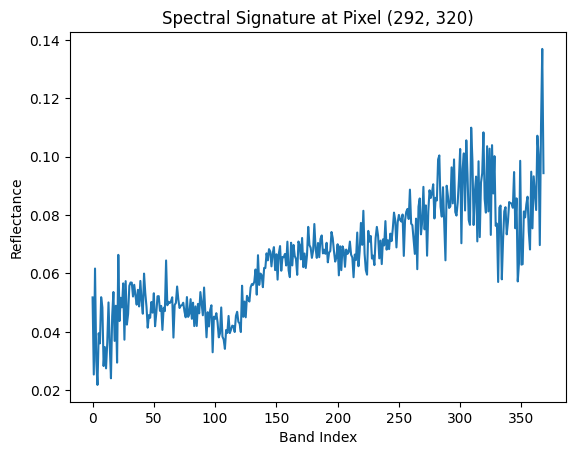

In [27]:
# First let's visualize the information!
from hypyflow import HyperspectralViewer, constants

wavelenghts=constants.HEADWALL_VNIR_WAVELENGHTS
# Create and run the viewer
viewer = HyperspectralViewer(cube, wavelenghts)
viewer.run()

 - Using previous mask, skipping masking blocks


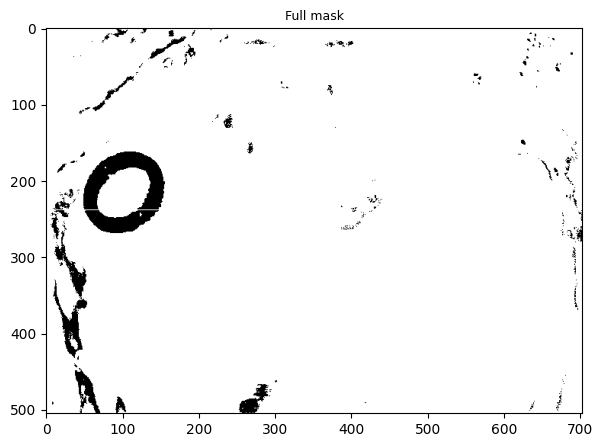

In [3]:
# hago que la variable cube, en lugar de la tercera dimension tener 369 dimensiones, tenga desde la 100 hasta la 369
#cube = cube[:,:,100:369]

preprocesschain = [
    blocks.MaskNegativeValues(),
    blocks.MaskZeroValues(),
    blocks.MaskSaturatedValues(99.5), #
    #blocks.ProcessNormalize(type="MinMax"),#
    blocks.ProcessDenoise(),
    blocks.MaskRxAnomalyDetection(0.2), #
    #blocks.MaskTargetSignature(interactive=True,select_area=True,method="SC"), #TODO: hacer que la barra selectora sea logarítmica, para que cuando me acerque a 0.1 no sea tan dificil seleccionar
    #blocks.MaskTargetSignature(interactive=True,select_area=True,method="SAM"),
    blocks.ProcessSmoothSpectral("moving_average", params={"window_size": 3}),#(method="moving_average", params={"window_size": 3}),
    blocks.ProcessSmoothSpatial()
]

try:
    if os.path.exists(f"/home/arturo.samayor/Practicas/ImagenesHiperespectrales/Masks/mask{number}.npy"):# and "headwall" in cube_path.lower():
        full_mask = np.load(f"/home/arturo.samayor/Practicas/ImagenesHiperespectrales/Masks/mask{number}.npy")
    elif os.path.exists(f"/home/arturo.samayor/Practicas/ImagenesHiperespectrales/Masks/mask{number}.npy") and "snapshot" in cube_path.lower():
        full_mask = np.load(f"/home/arturo.samayor/Practicas/ImagenesHiperespectrales/Masks/mask{number}.npy")
    else: full_mask = None
    masks = None
except:
    full_mask = None
    masks = None
pre = PreprocessingPipeline(cube)
filtered_data, full_mask, masks = pre(preprocesschain, verbose=False, plot_masks=True, mask=full_mask) # donde full_mask es la mascara final

np.save(f"/home/arturo.samayor/Practicas/ImagenesHiperespectrales/Masks/mask{number}.npy", full_mask)

In [4]:
import matplotlib.pyplot as plt
# mostrar la firma espectral de los siguientes píxeles de izq a derecha
'''
píxel 281, 286 -> tumor
píxel 292, 53 -> tumor (no aparece nada en la imagen hs)
píxel 325, 450 -> no es tumor
'''
# plt.plot(filtered_data[281, 286, 63:124], label="281, 286 - TUMOR")
# # plt.plot(filtered_data[292, 53, 63:124], label="292, 53 - TUMOR")
# # plt.plot(filtered_data[325, 451, 63:124], label="325, 450 - NO TUMOR")
# # plt.plot(filtered_data[210, 490, 63:124], label="325, 450 - NO TUMOR")
# plt.legend()
# plt.title("Firmas espectrales")
# plt.xlabel("Longitud de onda")
# plt.ylabel("Reflejo")
# plt.show()

'\npíxel 281, 286 -> tumor\npíxel 292, 53 -> tumor (no aparece nada en la imagen hs)\npíxel 325, 450 -> no es tumor\n'

## Obtención de Valores de Hb y HbO2

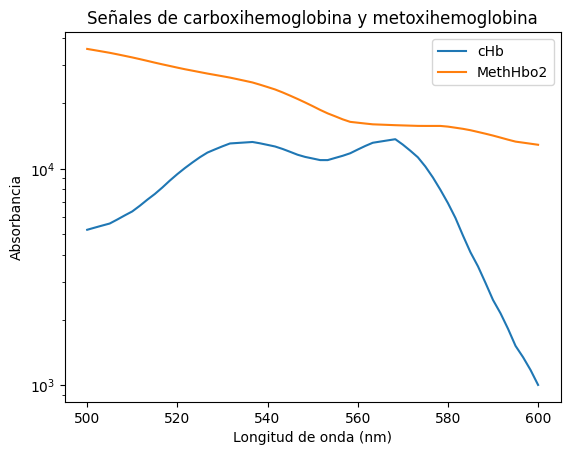

media de hb_sign: 218.02288463287263Tamaño de hb_sign: (369,)
media de hbO2_sign: 177.8933962192412Tamaño de hbO2_sign: (369,)
media de other_sign_new: 59567.428702142824Tamaño de other_sign_new: (369,)
media de hb_concatenated: 203.6512638737705
media de hbo2_concatenated: 178.3047344809836
valor máximo del cubo en process_intervals_and_normalize: 10.0


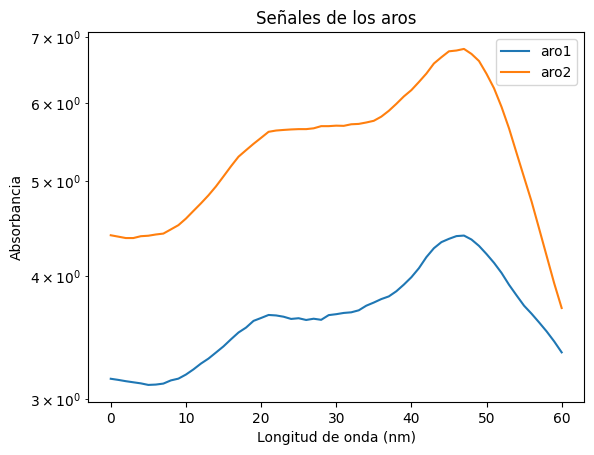


media de hb_concatenated: 203.6512638737705
media de hbo2_concatenated: 178.3047344809836
media de other_concatenated: 740.0894622295081
Longitud de hb_concatenated: 61
Longitud de hbo2_concatenated: 61
Longitud de other_concatenated: 61
Formas - hb_sign: (369,) hbO2_sign: (369,) filtered_data: (505, 703, 61)
La media del cubo enmascarado es: 2.3192704354699054
El valor máximo del cubo enmascarado es: 13.095056444688764 y el valor mínimo es: 0.0


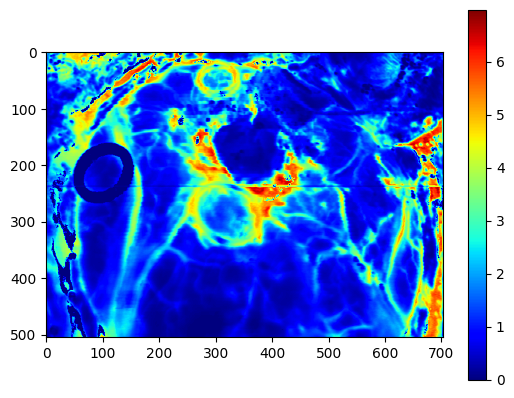

  0%|          | 0/505 [00:00<?, ?it/s]

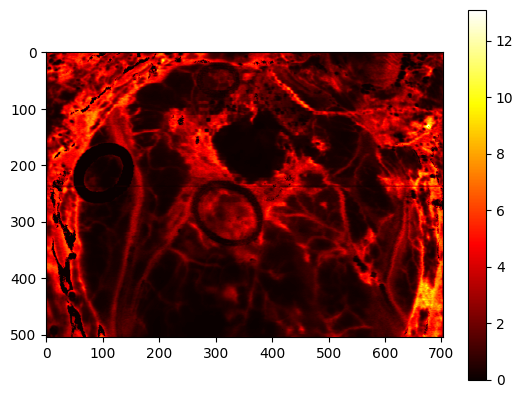

Hb min/max: 0.0 0.012001225652925255
HbO2 min/max: 0.0 0.037922638377955245
media de ab_hb: 0.0007570350034666368
media de ab_hbo2: 0.005573617230267162


In [31]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from tqdm.auto import tqdm, trange
from scipy.interpolate import interp1d
import scipy.optimize

# ============================================================== #
# [+] Funciones auxiliares
# ============================================================== #
def SAM(data: np.ndarray, signature: np.ndarray):
    """
    Spectral Angle Mapper.
    Computes the angle between two spectra, the result is a value between 0 and pi/2m the smaller the value, the more similar the spectra are.
    Args:
        data (np.ndarray): The hyperspectral data cube. The shape of the data must be (n_rows, n_cols, n_bands)
        signature (np.ndarray): The spectral signature to compare. The shape of the signature must be (n_bands,)
        threshold (float): The threshold to create the mask
    Returns:
        np.ndarray: The image with the spectral angle values
        np.ndarray: The mask with the pixels that are similar to the signature
    """
    spectral_angle = np.arccos(np.sum(signature * data) / (np.linalg.norm(signature) * np.linalg.norm(data)))
    #print(f"El valor de la función SAM es: {spectral_angle}")
    return spectral_angle


def from_reflectance_to_absorbance(data_reflectance):
    data_reflectance = data_reflectance#/np.max(data_reflectance)  # Normaliza los datos de reflectancia
    epsilon = 1e-10  # Un valor pequeño para evitar el logaritmo de cero
    reflectance = np.clip(data_reflectance, epsilon, np.max(data_reflectance))  # Recorta los valores entre epsilon y 1
    absorbance = -np.log10(reflectance)
    return absorbance

# Método de aplicación de la máscara
def apply_mask(data, mask):
    masked_data = np.zeros_like(data)
    for i in range(data.shape[2]):
        masked_data[:, :, i] = np.where(mask, data[:, :, i], 0)
    return masked_data

# en este método, a todos los valores se le sumará el valor absoluto del valor mínimo
# para que todos los valores sean positivos
def always_positive(data):
    return data + np.abs(np.min(data))

def concatenate_and_normalize(sign, intervals):
    """
    Concatenar y normalizar señales espectrales en intervalos específicos.

    Args:
        sign (numpy.ndarray): Señal de un compuesto.
        intervals (list of tuples): Lista de intervalos de longitud de onda [(inicio, fin), ...]

    Returns:
        tuple: Arrays concatenados y normalizados (final_sign).
    """
    def normalize(data):
        return (data) #/ max
    
    final_sign = []
    start = intervals[0][0]
    end = intervals[-1][1]
    # compruebo cuál de los signos tiene el valor máximo más altos dentro del intervalo
    max_hb = np.max(hb_sign[start:end])
    max_hbo2 = np.max(hbO2_sign[start:end])
    max_other = np.max(other_sign_new[start:end])
    
    '''if max_hb > max_hbo2 and max_hb > max_other:
        print(f"El signo con el valor máximo más alto en el intervalo {start}-{end} es hb_sign con un valor de {max_hb}")
        max = max_hb
    elif max_hbo2 > max_hb and max_hbo2 > max_other:
        print(f"El signo con el valor máximo más alto en el intervalo {start}-{end} es hbO2_sign con un valor de {max_hbo2}")
        max = max_hbo2
    else:
        print(f"El signo con el valor máximo más alto en el intervalo {start}-{end} es other_sign_new con un valor de {max_other}")
        max = max_other'''
    max = max_hbo2
    
    for start, end in intervals:
        sign_segment = normalize(sign[start:end])
        
        final_sign.append(sign_segment)
    
    # Concatenar los segmentos normalizados
    final_sign = np.concatenate(final_sign)
    
    return final_sign

def process_intervals_and_normalize(masked_cube, intervals, max):
    """
    Normaliza y concatena las partes del cubo hiperespectral definidas por los intervalos.

    Args:
        masked_cube (numpy.ndarray): Cubo hiperespectral de entrada (alto, ancho, bandas).
        intervals (list of tuples): Lista de intervalos (inicio, fin) que definen las bandas a procesar.

    Returns:
        numpy.ndarray: Cubo hiperespectral normalizado y concatenado.
    """
    processed_parts = []
    print("valor máximo del cubo en process_intervals_and_normalize:", np.max(masked_cube))

    for start, end in intervals:
        # Seleccionar las bandas correspondientes al intervalo
        cube_part = masked_cube[:, :, start:end]
        
        # Normalizar el intervalo
        #cube_part_normalized = (cube_part - np.min(cube_part)) / (np.max(cube_part) - np.min(cube_part))
        #cube_part_normalized = cube_part/np.max(cube_part)
        cube_part_normalized = cube_part#/max

        # Agregar la parte normalizada a la lista
        processed_parts.append(cube_part_normalized)

    # Concatenar todas las partes a lo largo del eje de las bandas
    concatenated_cube = np.concatenate(processed_parts, axis=2)

    return concatenated_cube


def interpolate_spectrum(original_wavelengths, original_values, target_min_wl=500, target_max_wl=1000, num_points=100):
    """
    Interpola datos espectrales a un nuevo conjunto de longitudes de onda especificadas.

    Esta función toma un espectro definido por sus longitudes de onda y valores originales,
    y devuelve un nuevo espectro interpolado en un número específico de puntos
    distribuidos uniformemente dentro de un rango de longitud de onda objetivo.

    Args:
        original_wavelengths (np.ndarray or list-like): Array o lista de las longitudes de onda originales.
        original_values (np.ndarray or list-like): Array o lista de los valores espectrales correspondientes
                                                    a las longitudes de onda originales.
        target_min_wl (float, optional): Longitud de onda mínima del nuevo conjunto interpolado.
                                        Por defecto es 500.
        target_max_wl (float, optional): Longitud de onda máxima del nuevo conjunto interpolado.
                                        Por defecto es 1000.
        num_points (int, optional): Número de puntos (longitudes de onda) deseado en el
                                    nuevo conjunto interpolado. Por defecto es 100.

    Returns:
        tuple: Una tupla conteniendo dos arrays de NumPy:
            - target_wavelengths (np.ndarray): El nuevo array de longitudes de onda, con 'num_points'
                                            elementos espaciados uniformemente entre 'target_min_wl'
                                            y 'target_max_wl'.
            - interpolated_values (np.ndarray): El array de valores espectrales interpolados
                                                correspondientes a 'target_wavelengths'.
    Raises:
        ValueError: Si las longitudes de los arrays de entrada no coinciden o si
                    los datos de entrada no son adecuados para la interpolación.
    """
    # Asegurarse de que los datos de entrada son arrays de numpy y tienen la misma longitud
    original_wavelengths = np.asarray(original_wavelengths)
    original_values = np.asarray(original_values)

    if original_wavelengths.shape != original_values.shape or original_wavelengths.ndim != 1:
        raise ValueError("Las longitudes de onda y los valores originales deben ser arrays 1D de la misma longitud.")
    if len(original_wavelengths) < 2:
        raise ValueError("Se necesitan al menos dos puntos de datos para la interpolación.")

    # Crear el nuevo eje de longitudes de onda objetivo
    target_wavelengths = np.linspace(target_min_wl, target_max_wl, num_points)

    # Crear la función de interpolación lineal
    # kind='linear' es una opción robusta. Se podría usar 'cubic' para mayor suavidad si los datos lo permiten.
    # bounds_error=False evita errores si target_wavelengths está ligeramente fuera del rango original,
    # fill_value="extrapolate" intentará extrapolar en esos casos.
    try:
        interp_func = interp1d(original_wavelengths, original_values,
                                kind='linear',
                                bounds_error=False,
                                fill_value="extrapolate")
    except ValueError as e:
        raise ValueError(f"Error al crear la función de interpolación: {e}. Verifica que las longitudes de onda originales estén ordenadas.") from e

    # Calcular los valores interpolados en las longitudes de onda objetivo
    interpolated_values = interp_func(target_wavelengths)

    return target_wavelengths, interpolated_values

# ============================================================== #

# ============================================================== #
# [+] Carga de las signaturas de los compuestos y normalización
# ============================================================== #

hb_sign = np.loadtxt("/home/arturo.samayor/Practicas/StO2_arturo/data/spectral_signs/extintionCoefficient/hb_sign_reduced.txt")[:, 1]
hbO2_sign = np.loadtxt("/home/arturo.samayor/Practicas/StO2_arturo/data/spectral_signs/extintionCoefficient/hbo2_sign_reduced.txt")[:, 1]
other_sign_new = np.loadtxt("/home/arturo.samayor/Practicas/StO2_arturo/data/spectral_signs/extintionCoefficient/pruebas_agua/agua_absorcionFinal.csv")[:, 1]
#hbs
carboxyhemoglobin_sign = np.loadtxt("/home/arturo.samayor/Practicas/StO2_arturo/data/spectral_signs/othersHB/carboxyHb.txt", delimiter=",")[:, 1]
methoxyhemoglobin_sign = np.loadtxt("/home/arturo.samayor/Practicas/StO2_arturo/data/spectral_signs/othersHB/MethHb.txt", delimiter=",")[:, 1]
original_wl_carboxy = np.linspace(500, 600, len(carboxyhemoglobin_sign))
target_wl_carboxy, interp_carboxyhemoglobin_sign = interpolate_spectrum(
    original_wl_carboxy,
    carboxyhemoglobin_sign,
    target_min_wl=500,
    target_max_wl=600,
    num_points=61
)
original_wl_methoxy = np.linspace(500, 600, len(methoxyhemoglobin_sign))
target_wl_methoxy, interp_methoxyhemoglobin_sign = interpolate_spectrum(
    original_wl_methoxy,
    methoxyhemoglobin_sign,
    target_min_wl=500,
    target_max_wl=600,
    num_points=61
)
plt.figure()
plt.plot(target_wl_carboxy, interp_carboxyhemoglobin_sign, label="cHb")
plt.plot(target_wl_methoxy, interp_methoxyhemoglobin_sign, label="MethHbo2")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Absorbancia")
plt.yscale("log")
plt.title("Señales de carboxihemoglobina y metoxihemoglobina")
plt.legend()
plt.show()

print(f"media de hb_sign: {np.mean(hb_sign)}" + "Tamaño de hb_sign: " + str(hb_sign.shape))
print(f"media de hbO2_sign: {np.mean(hbO2_sign)}" + "Tamaño de hbO2_sign: " + str(hbO2_sign.shape))
print(f"media de other_sign_new: {np.mean(other_sign_new)}" + "Tamaño de other_sign_new: " + str(other_sign_new.shape))
# ============================================================== #

# ============================================================== #
# [+] Cálculo de las abundancias y aplicación de la máscara
# ============================================================== #
filtered_data_absorbance = from_reflectance_to_absorbance(filtered_data)#filtered_data  # CUBO DE HEIPORSPECTRAL ESTÁ MEDIDO EN ABSORBANCIA
masked_cube = apply_mask(filtered_data_absorbance, full_mask)


#intervals = [(0,20)] # 500-1000 nm (variaciones finales útiles para análisis)
intervals = [(63, 124)] # de 500 a 600, hay 369 bandas en total, empezando en 400 nm y terminando en 1000 nm


# Define tus intervalos de longitud de onda

max = np.max(hbO2_sign)
hb_concatenated = concatenate_and_normalize(hb_sign, intervals)
hbo2_concatenated = concatenate_and_normalize(hbO2_sign, intervals)
print("media de hb_concatenated:", np.mean(hb_concatenated))
print("media de hbo2_concatenated:", np.mean(hbo2_concatenated))
other_concatenated = concatenate_and_normalize(other_sign_new, intervals)
masked_cube = process_intervals_and_normalize(masked_cube, intervals, max)
masked_cube = masked_cube**4

# firmas espectrales de los aros
pixels_to_plot =  [(318, 285) ,(46, 338)] 
aro1_sign = masked_cube[318, 285]
aro2_sign = masked_cube[46, 338]

# ploteo los píxeles de los aros
plt.figure()
plt.plot(aro1_sign, label="aro1")
plt.plot(aro2_sign, label="aro2")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Absorbancia")
plt.yscale("log")
plt.title("Señales de los aros")
plt.legend()
plt.show()


'''################### INTERPOLACIÓN
# interpolar hb_concatenated y hbo2_concatenated para que tengan la misma longitud que el cubo
orig_bands = 37 # numero de bandas de hb_concatenated y hbo2_concatenated
new_bands  = 61 # numero de bandas del cubo
λ_orig = np.arange(orig_bands)                 
λ_new  = np.linspace(λ_orig[0], λ_orig[-1], new_bands)


def interp_espectral(mat, λ_orig, λ_new, kind='cubic'):
    f = interp1d(λ_orig, mat, axis=-1, kind=kind, bounds_error=False, fill_value="extrapolate")
    return f(λ_new)

# hb_concatenated y hbo2_concatenated pueden ser (N, 37) o (X, Y, 37)… lo importante es que
# la dimensión de las bandas sea la última
hb_concatenated   = interp_espectral(hb_concatenated,   λ_orig, λ_new)
hbo2_concatenated = interp_espectral(hbo2_concatenated, λ_orig, λ_new)

print(hbo2_concatenated.shape, hbo2_concatenated.shape)

################### INTERPOLACIÓN'''


print(f"\nmedia de hb_concatenated: {np.mean(hb_concatenated)}")
print(f"media de hbo2_concatenated: {np.mean(hbo2_concatenated)}")
print(f"media de other_concatenated: {np.mean(other_concatenated)}")

# voy a hacer el concatenate y normalize de masked_cube
#masked_cube_500_600 = (masked_cube[:,:,0:20] - np.min(masked_cube[:,:,0:20])) / (np.max(masked_cube[:,:,0:20]) - np.min(masked_cube[:,:,0:20]))
#masked_cube_600_1000 = (masked_cube[:,:,20:100] - np.min(masked_cube[:,:,20:100])) / (np.max(masked_cube[:,:,20:100]) - np.min(masked_cube[:,:,20:100]))

#masked_cube = np.concatenate((masked_cube_500_600, masked_cube_600_1000), axis=2)'''

print("Longitud de hb_concatenated:", len(hb_concatenated))
print("Longitud de hbo2_concatenated:", len(hbo2_concatenated))
print("Longitud de other_concatenated:", len(other_concatenated))

#masked_cube = always_positive(masked_cube)
# ============================================================== #

# ============================================================== #
# [+] Caso en el que queramos reducir la cantidad de datos
# ============================================================== #
#masked_cube = masked_cube[:,:,20:]
new_masked_cube = masked_cube# - np.min(masked_cube)) / (np.max(masked_cube) - np.min(masked_cube))# LO ULTIMO QUE HAGO
hb_sign_new = hb_concatenated
hbO2_sign_new = hbo2_concatenated
other_sign_new = other_concatenated
# ============================================================== #

# ============================================================== #
# [+] Visualización de forma de los datos
# ============================================================== #
height, width, bands = masked_cube.shape
print("Formas - hb_sign:", hb_sign.shape, "hbO2_sign:", hbO2_sign.shape, "filtered_data:", masked_cube.shape)
print(f"La media del cubo enmascarado es: {np.mean(new_masked_cube)}")
print(f"El valor máximo del cubo enmascarado es: {np.max(new_masked_cube)} y el valor mínimo es: {np.min(new_masked_cube)}")
plt.imshow(masked_cube[:, :, 0], cmap="jet")
plt.colorbar()
plt.show()

######################### CHATGPT #########################
#other_sign = np.ones_like(hb_sign)
#other_sign = (other_sign - np.min(other_sign)) / (np.max(other_sign) - np.min(other_sign))
#other_sign_new = other_sign
ab_other = np.zeros((height, width))
def residuals(x, pixel, hb_sign, hbo2_sign, other_sign):
    ab_hb, ab_hbo2, ab_other = x  # x es un vector con tres elementos: ab_hb, ab_hbo2 y ab_other
    model = ab_hb * hb_sign + ab_hbo2 * hbo2_sign + ab_other * other_sign  # Modelo lineal de absorbancia
    #return RMSE(pixel, model)
    return pixel - model  # Residuos: diferencia entre lo observado y lo modelado
######################### CHATGPT #########################


# ============================================================== #

# ============================================================== #
# [+] Inicialización de las matrices de abundancias
# ============================================================== #
ab_hb = np.zeros((height, width))
ab_hbo2 = np.zeros((height, width))
ab_carboxy = np.zeros((height, width))
ab_methoxy = np.zeros((height, width))
ab_aro1 = np.zeros((height, width))
ab_aro2 = np.zeros((height, width))
error = np.zeros((height, width))
# ============================================================== #

# ============================================================== #
# [+] Función de residuos y optimización de las abundancias
# ============================================================== #
def residuals(x, pixel, hb_sign, hbo2_sign, other_sign):
    ab_hb, ab_hbo2, ab_other = x  # x es un vector con dos elementos: ab_hb y ab_hbo2
    model = ab_hb * hb_sign + ab_hbo2 * hbo2_sign + ab_other * other_sign  # Modelo lineal de absorbancia
    #return (pixel - model)**2  # Residuos: diferencia entre lo observado y lo modelado
    return RMSE(pixel, model)

def RMSE(y1, y2):
    return np.sqrt(np.mean((y1 - y2) ** 2))

'''def residuals_with_regularization(x, pixel, hb_sign, hbO2_sign, other_sign, lambda_reg=0.01):
    ab_hb, ab_hbo2, ab_other = x
    model = ab_hb * hb_sign + ab_hbo2 * hbO2_sign + ab_other * other_sign
    residual = pixel - model
    # Penalización L1 (Lasso)
    penalty = lambda_reg * (np.sum(np.abs(x)))
    # O penalización L2 (Ridge)
    # penalty = lambda_reg * np.sum(x**2)
    return np.sum(residual**2) + penalty  # Sumamos la penalización'''
    
def residuals_with_regularization_and_loss_sam(
    x, pixel, hb_sign, hbO2_sign, other_sign, lambda_reg=0.01, lambda_sam=0.1
):
    ab_hb, ab_hbo2, ab_other = x
    model = ab_hb * hb_sign + ab_hbo2 * hbO2_sign + ab_other * other_sign

    residual = pixel - model
    sam_cost = loss_SAM(x, pixel, hb_sign, hbO2_sign, other_sign)

    # Combina el residuo y el SAM en un solo vector.
    combined_residual = np.concatenate((residual, [sam_cost]))

    return combined_residual # Solo devuelve combined_residual

# --- Jacobiano (NUEVO) ---
def jacobian_with_regularization(
    x, pixel, hb_sign, hbO2_sign, other_sign, lambda_reg, lambda_sam
):
    ab_hb, ab_hbo2, ab_other = x
    n_bands = len(pixel)

    # Jacobiano de la parte del residuo (derivadas parciales del modelo)
    jac_residual = -np.array([hb_sign, hbO2_sign, other_sign]).T

    # Jacobiano de SAM (aproximación numérica - podría hacerse analíticamente, pero es complicado)
    delta = 1e-8  # Un pequeño incremento
    sam_base = loss_SAM(x, pixel, hb_sign, hbO2_sign, other_sign)
    jac_sam = np.zeros(3)  # 3 porque tenemos ab_hb, ab_hbo2, ab_other

    for i in range(3):
        x_perturbed = x.copy()
        x_perturbed[i] += delta
        sam_perturbed = loss_SAM(x_perturbed, pixel, hb_sign, hbO2_sign, other_sign)
        jac_sam[i] = (sam_perturbed - sam_base) / delta

    # Combina los jacobianos
    jac = np.vstack((jac_residual, jac_sam * lambda_sam)) # El lambda_sam ya está multiplicando.

    # Añade la regularización L1 al Jacobiano.  Esto es lo clave.
    reg_jac = np.zeros((jac.shape[0], 3))  # Inicializa con ceros
    reg_jac[:, 0] = lambda_reg * np.sign(ab_hb)
    reg_jac[:, 1] = lambda_reg * np.sign(ab_hbo2)
    reg_jac[:, 2] = lambda_reg * np.sign(ab_other)



    return jac + reg_jac




# En least_squares:
'''def process_pixel(i, j):
    pixel = new_masked_cube[i, j, :]

    if pixel.sum() == 0:
        return i, j, [0, 0, 0], 0

    initial_guess = [0.1, 0.1, 0]

    result = least_squares(
        residuals_with_regularization_and_loss_sam,
        initial_guess,
        jac=jacobian_with_regularization,
        args=(pixel, hb_sign_new, hbO2_sign_new, other_sign_new, 0.01, 0.1),  # Ajusta lambda_reg y lambda_sam
        bounds=([0, 0, 0], [1, 1, 1]),
        x_scale="jac",
        loss="linear",  # Importante: Usa "linear"
    )
    return i, j, result.x, result.cost'''

def loss_SAM(x, pixel, hb_sign, hbO2_sign, other_sign):
    ab_hb, ab_hbo2, ab_other = x
    model = ab_hb * hb_sign + ab_hbo2 * hbO2_sign + other_sign * ab_other
    return SAM(pixel, model)



# Aplicar least_squares
def process_pixel(i, j):
    pixel = new_masked_cube[i, j, :]  # Datos de absorbancia del píxel
    
    # Si el píxel es 0 por la máscara, no calcula nada
    if pixel.sum() == 0:
        return i, j, [0, 0, 0, 0, 0, 0, 0], 0
    
    initial_guess = [0.01, 0.01, 0.01]  # Un punto de partida para ab_hb y ab_hbo2
    
    # Ejecutar least_squares
    '''result = least_squares(
        loss_SAM, 
        initial_guess, 
        args=(pixel, hb_sign_new, hbO2_sign_new, other_sign_new), 
        bounds=([0, 0, 0], [None, None, None]), # [1, 0.5, 0.08]
        x_scale='jac',
        loss='soft_l1',
        #verbose=2
    )'''
    result, residuo = scipy.optimize.nnls(
        np.array([hb_sign_new, hbO2_sign_new, other_sign_new, interp_carboxyhemoglobin_sign, interp_methoxyhemoglobin_sign, aro1_sign, aro2_sign]).T,
        pixel
    )
    return i, j, result, residuo
    #return i, j, result.x, result.cost

results = Parallel(n_jobs=40)(
    delayed(process_pixel)(i, j) for i in trange(height) for j in range(width)
)

for i, j, abundances, errors in results:
    ab_hb[i, j], ab_hbo2[i, j], ab_other[i, j], ab_carboxy[i, j], ab_methoxy[i, j], ab_aro1[i, j], ab_aro2[i, j] = abundances
    error[i, j] = errors
    
plt.imshow(error, cmap="hot")
plt.colorbar()
plt.show()
'''# Opcional: Si deseas establecer las abundancias de Hb y HbO2 a cero cuando la abundancia de 'other' es alta
# Define un umbral según tus necesidades, por ejemplo, 0.8
umbral_other = 0.8
mask_no_component = ab_other > umbral_other
ab_hb[mask_no_component] = 0
ab_hbo2[mask_no_component] = 0''' #PARA PROBAR

# Mostrar los valores mínimos y máximos de cada matriz de abundancias
print("Hb min/max:", np.min(ab_hb), np.max(ab_hb))
print("HbO2 min/max:", np.min(ab_hbo2), np.max(ab_hbo2))
print(f"media de ab_hb: {np.mean(ab_hb)}")
print(f"media de ab_hbo2: {np.mean(ab_hbo2)}")




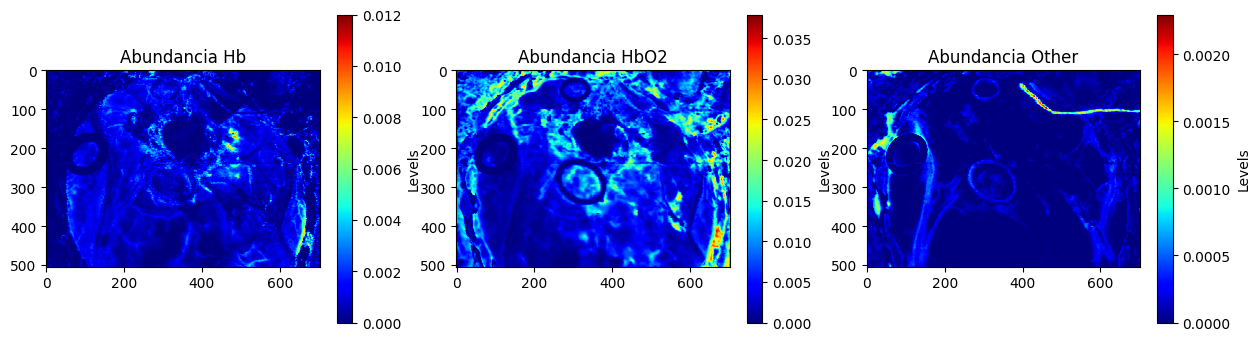

In [6]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(ab_hb, cmap="jet")
plt.colorbar(label="Levels")
plt.title("Abundancia Hb")

plt.subplot(1, 3, 2)
plt.imshow(ab_hbo2, cmap="jet")
plt.colorbar(label="Levels")
plt.title("Abundancia HbO2")


plt.subplot(1, 3, 3)
plt.imshow(ab_other, cmap="jet")
plt.colorbar(label="Levels")
plt.title("Abundancia Other")

plt.show()

/tmp/ipykernel_3403326/3717397449.py:13: RuntimeWarning: invalid value encountered in scalar divide
  ab_hb_value = ab_hb[i, j]/np.max(ab_hb[i, j])
/tmp/ipykernel_3403326/3717397449.py:15: RuntimeWarning: invalid value encountered in scalar divide
  ab_other_value = ab_other[i, j]/np.max(ab_other[i, j])


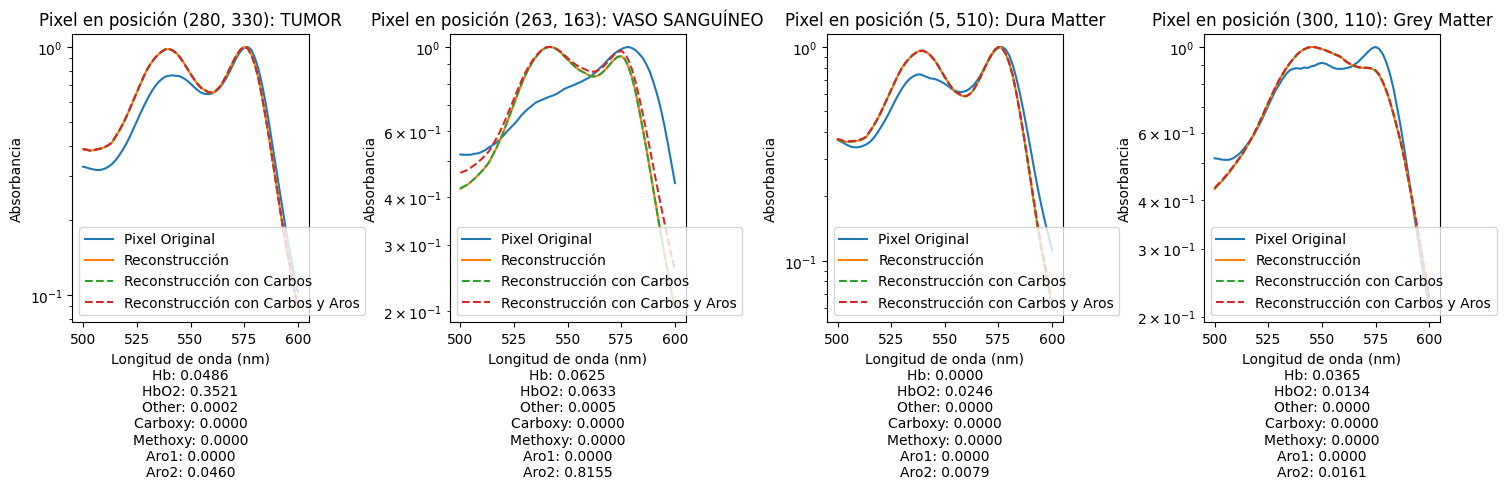

Píxel 280, 330: TUMOR
Píxel 263, 163: VASO SANGUÍNEO
Píxel 5, 510: Dura Matter
Píxel 300, 110: Grey Matter

[+] ABUNDANCIAS DE LOS PIXELES:
Pixel (280, 330):
  Hb: 0.04857080931549801
  HbO2: 0.3521156439761227
  Other: 0.0002330122292328605
  Carboxy: 0.0
  Methoxy: 0.0
  Aro1: 0.0
  Aro2: 0.04602621331646528

Pixel (263, 163):
  Hb: 0.0624679086981923
  HbO2: 0.06332165679145761
  Other: 0.00048075901361027077
  Carboxy: 0.0
  Methoxy: 0.0
  Aro1: 0.0
  Aro2: 0.8155440331423318

Pixel (5, 510):
  Hb: 0.0
  HbO2: 0.024617218804327816
  Other: 1.3131115250209922e-05
  Carboxy: 0.0
  Methoxy: 0.0
  Aro1: 0.0
  Aro2: 0.007859631225868711

Pixel (300, 110):
  Hb: 0.03648877535796225
  HbO2: 0.013431839568257208
  Other: 0.0
  Carboxy: 5.102944582475412e-07
  Methoxy: 0.0
  Aro1: 0.0
  Aro2: 0.016130405022196596



In [30]:
# Plotear las reconstrucciones de los píxeles junto a la firma
import matplotlib.pyplot as plt

# Seleccionar algunos píxeles para visualizar
pixels_to_plot = [(280, 330), (263, 163), (5, 510), (300, 110)]  # (i, j) de los píxeles a visualizar
# pixels_to_plot =  [(318, 285) ,(46, 338)] 

# Crear una figura para los gráficos
plt.figure(figsize=(15, 5))

for idx, (i, j) in enumerate(pixels_to_plot):
    pixel = new_masked_cube[i, j, :]#/np.max(new_masked_cube[i, j, :])
    ab_hb_value = ab_hb[i, j]/np.max(ab_hb[i, j])
    ab_hbo2_value = ab_hbo2[i, j]/np.max(ab_hbo2[i, j])
    ab_other_value = ab_other[i, j]/np.max(ab_other[i, j])
    #ab_carboxy_value = ab_carboxy[i, j]/np.max(ab_carboxy[i, j])
    #ab_methoxy_value = ab_carboxy[i, j]/np.max(ab_carboxy[i, j])
    
    # Reconstrucción del modelo
    model = (ab_hb[i, j] * hb_sign_new
    + ab_hbo2[i, j] * hbO2_sign_new 
    + ab_other[i, j] * other_sign_new)
    
    model_carbo_met = (ab_hb[i, j] * hb_sign_new
    + ab_hbo2[i, j] * hbO2_sign_new 
    + ab_other[i, j] * other_sign_new
    + ab_carboxy[i, j] * interp_carboxyhemoglobin_sign
    + ab_methoxy[i, j] * interp_methoxyhemoglobin_sign)
    
    model_full_con_aros = (ab_hb[i, j] * hb_sign_new
    + ab_hbo2[i, j] * hbO2_sign_new
    + ab_other[i, j] * other_sign_new
    + ab_carboxy[i, j] * interp_carboxyhemoglobin_sign
    + ab_methoxy[i, j] * interp_methoxyhemoglobin_sign
    + ab_aro1[i, j] * aro1_sign
    + ab_aro2[i, j] * aro2_sign)
    
    # normalizamos los modelos y el pixel original para la representación
    pixel = pixel/np.max(pixel)
    model = model/np.max(model)
    model_carbo_met = model_carbo_met/np.max(model_carbo_met)
    model_full_con_aros = model_full_con_aros/np.max(model_full_con_aros)
    
    # Plotear el pixel y la reconstrucción
    plt.subplot(1, len(pixels_to_plot), idx + 1)
    plt.plot(np.linspace(500, 600, len(pixel)), pixel, label='Pixel Original')
    plt.plot(np.linspace(500, 600, len(model)), model, label='Reconstrucción')
    plt.plot(np.linspace(500, 600, len(model_carbo_met)), model_carbo_met, label='Reconstrucción con Carbos', linestyle='--')
    plt.plot(np.linspace(500, 600, len(model_full_con_aros)), model_full_con_aros, label='Reconstrucción con Carbos y Aros', linestyle='--')
    
    # muestro firmas espectrales de los aros
    # plt.plot(np.linspace(500, 600, len(aro1_sign)), aro1_sign, label='Aro1', linestyle='--')
    # plt.plot(np.linspace(500, 600, len(aro2_sign)), aro2_sign, label='Aro2', linestyle='--')
    # ahora de la hbo2
    # plt.plot(np.linspace(500, 600, len(hbO2_sign_new)), hbO2_sign_new, label='HbO2')
    
    '''plt.plot(np.linspace(500, 600, len(hb_sign_new)), hb_sign_new, label='Hb')
    plt.plot(np.linspace(500, 600, len(hbO2_sign_new)), hbO2_sign_new, label='HbO2')'''
    #plt.plot(np.linspace(500, 600, len(other_sign_new)), other_sign_new, label='Other')
    #plt.yscale('log')
    
    if i == 280:
        titulo = "TUMOR"
    elif i == 263:
        titulo = "VASO SANGUÍNEO"
    elif i == 5:
        titulo = "Dura Matter"
    elif i == 300:
        titulo = "Grey Matter"
    else:
        titulo = "ARO"
    
    plt.title(f'Pixel en posición ({i}, {j}): {titulo}')
    plt.xlabel('Longitud de onda (nm)\n'
            f'Hb: {ab_hb[i, j]:.4f}\n'
            f'HbO2: {ab_hbo2[i, j]:.4f}\n'
            f'Other: {ab_other[i, j]:.4f}\n'
            f'Carboxy: {ab_carboxy[i, j]:.4f}\n'
            f'Methoxy: {ab_methoxy[i, j]:.4f}\n'
            f'Aro1: {ab_aro1[i, j]:.4f}\n'
            f'Aro2: {ab_aro2[i, j]:.4f}')
    plt.ylabel('Absorbancia')
    plt.yscale('log')
    plt.legend()

plt.tight_layout()
plt.show()
print("Píxel 280, 330: TUMOR\n" + 
    "Píxel 263, 163: VASO SANGUÍNEO\n"+
    "Píxel 5, 510: Dura Matter\n"+
    "Píxel 300, 110: Grey Matter\n")
print("[+] ABUNDANCIAS DE LOS PIXELES:")
for i, j in pixels_to_plot:
    print(f"Pixel ({i}, {j}):")
    print(f"  Hb: {ab_hb[i, j]}")
    print(f"  HbO2: {ab_hbo2[i, j]}")
    print(f"  Other: {ab_other[i, j]}")
    print(f"  Carboxy: {ab_carboxy[i, j]}")
    print(f"  Methoxy: {ab_methoxy[i, j]}")
    print(f"  Aro1: {ab_aro1[i, j]}")
    print(f"  Aro2: {ab_aro2[i, j]}")
    print()


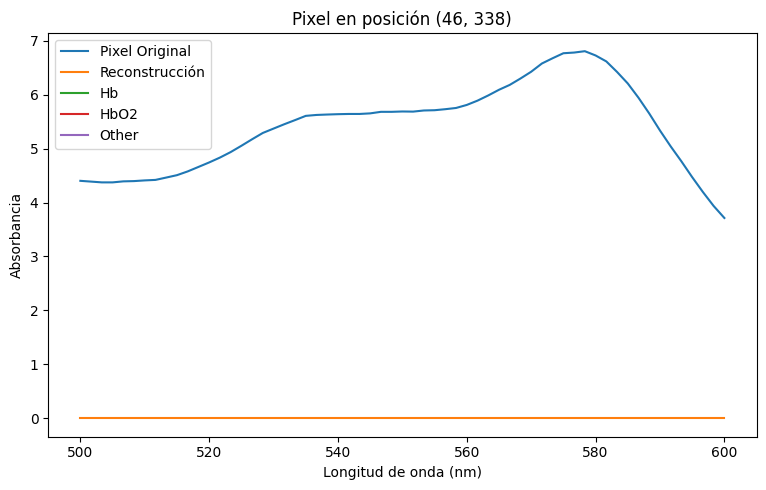

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1, len(pixels_to_plot), idx + 1)
plt.plot(np.linspace(500, 600, len(pixel)), pixel, label='Pixel Original')
plt.plot(np.linspace(500, 600, len(model)), model, label='Reconstrucción')
plt.plot(np.linspace(500, 600, len(ab_hb_value * hb_sign_new)), ab_hb_value * hb_sign_new, label='Hb')
plt.plot(np.linspace(500, 600, len(ab_hbo2_value * hbO2_sign_new )), ab_hbo2_value * hbO2_sign_new, label='HbO2')
plt.plot(np.linspace(500, 600, len(ab_other_value * other_sign_new)), ab_other_value * other_sign_new, label='Other')
plt.title(f'Pixel en posición ({i}, {j})')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Absorbancia')
#plt.xlim(500, 600)
plt.legend()

plt.tight_layout()
plt.show()

# FIRMAS ESPECTRALES

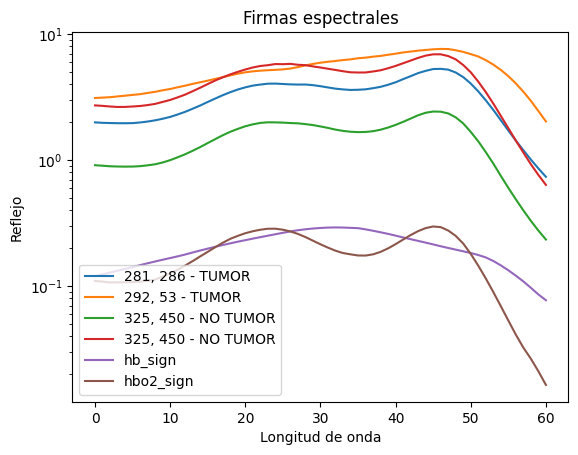

In [9]:
import matplotlib.pyplot as plt
# mostrar la firma espectral de los siguientes píxeles de izq a derecha
'''
píxel 281, 286 -> tumor
píxel 292, 53 -> tumor (no aparece nada en la imagen hs)
píxel 325, 450 -> no es tumor
'''
plt.plot(new_masked_cube[281, 286, :], label="281, 286 - TUMOR")
plt.plot(new_masked_cube[292, 53, :], label="292, 53 - TUMOR")
plt.plot(new_masked_cube[325, 451, :], label="325, 450 - NO TUMOR")
plt.plot(new_masked_cube[210, 490, :], label="325, 450 - NO TUMOR")

plt.plot(hb_sign_new/1000, label='hb_sign')
plt.plot(hbO2_sign_new/1000, label='hbo2_sign')
plt.yscale('log')

plt.legend(loc='lower left')
plt.title("Firmas espectrales")
plt.xlabel("Longitud de onda")
plt.ylabel("Reflejo")
plt.show()

## Mostrar niveles de Hb y HbO2

Abundancia Hb: min: 0.0 max: 0.012001225652925255
Abundancia HbO2: min: 0.0 max: 0.037922638377955245
Abundancia Agua: min: 0.0 max: 0.0022961335260240382


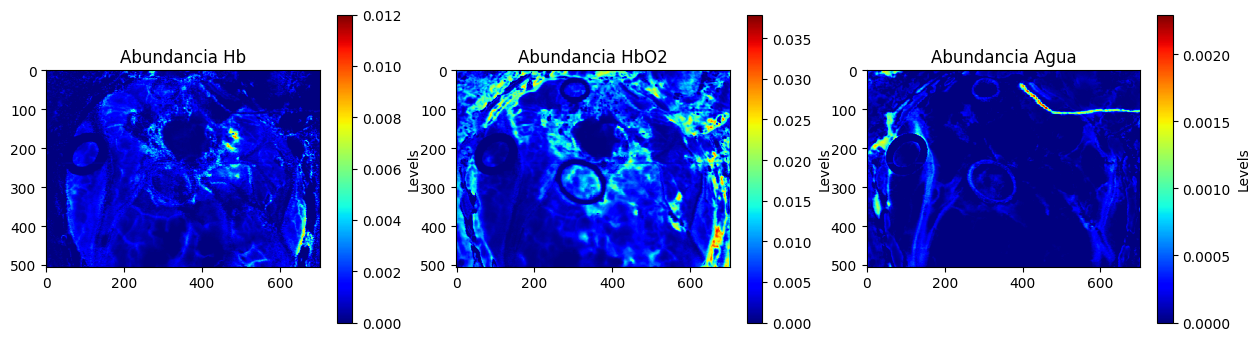

'plt.imshow(ab_bg[0]/ab_bg[0].max(), cmap="jet", vmin=0)\nplt.title("Abundancia Background")\nplt.show()'

In [10]:
# Visualizamos las abundancias
# muestro los máximos y mínimos de cada matriz
print("Abundancia Hb: min:", np.min(ab_hb), "max:", np.max(ab_hb))
print("Abundancia HbO2: min:", np.min(ab_hbo2), "max:", np.max(ab_hbo2))
print("Abundancia Agua: min:", np.min(ab_other), "max:", np.max(ab_other))
'''print("Abundancia Background: min:", np.min(ab_hbo2), "max:", np.min(ab_hbo2))'''



if (ab_hb.max() > ab_hbo2.max()):
    abmax = ab_hb.max()
else: abmax = ab_hbo2.max()
    

plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.imshow(ab_hb, cmap="jet", vmin=0, vmax=np.max(ab_hb))
plt.colorbar(label="Levels")
plt.title("Abundancia Hb")
plt.subplot(132)
plt.imshow(ab_hbo2, cmap="jet", vmin=0, vmax=np.max(ab_hbo2))
plt.colorbar(label="Levels")
plt.title("Abundancia HbO2")
plt.subplot(133)
plt.imshow(ab_other, cmap="jet", vmin=0, vmax=np.max(ab_other))
plt.colorbar(label="Levels")
plt.title("Abundancia Agua")
'''CHANGELOG.mdplt.subplot(144)
plt.imshow(ab_fat, cmap="jet", vmin=0, vmax=np.max(ab_fat))
plt.colorbar(label="Levels")
plt.title("Abundancia Fat")'''
plt.show()

# muestro la imagen de ab_background,
'''plt.imshow(ab_bg[0]/ab_bg[0].max(), cmap="jet", vmin=0)
plt.title("Abundancia Background")
plt.show()'''





## Mostrar niveles de StO2

media de ab_hb: 0.06307980745967492
media de ab_hbo2: 0.14697335071251666
STO2: min: 0.0 max: 0.9999999998914453


Text(0.5, 1.0, 'StO2')

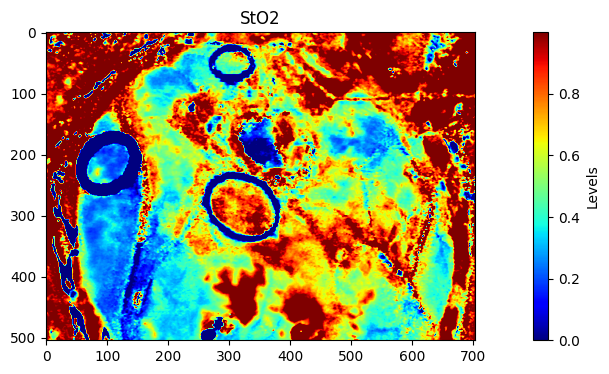

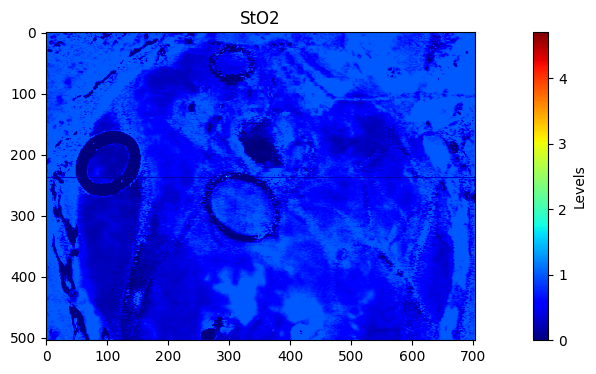

In [11]:
from scipy import ndimage

ab_hbo2 = ab_hbo2/ab_hbo2.max()
ab_hb = ab_hb/ab_hb.max()

print(f"media de ab_hb: {np.mean(ab_hb)}")
print(f"media de ab_hbo2: {np.mean(ab_hbo2)}")
#print(f"media de h2o: {np.mean(ab_other)}") 
epsilon = 1e-10  # Un valor pequeño para evitar el logaritmo de cero
# sto2 = (hbo2)/(hb + hbo2) * 100
sto2 = (ab_hbo2 / (ab_hb + ab_hbo2 + epsilon))
st_o2 = (((ab_hbo2-ab_other)) / (ab_hb + ab_hbo2+epsilon-ab_other))

sto2 = ndimage.median_filter(sto2, size=3)

sto2 = np.nan_to_num(sto2, nan=0, posinf=0, neginf=0)

# mostramos los máximos y mínimos de la matriz de sto2
print("STO2: min:", sto2.min(), "max:", sto2.max())



plt.figure(figsize=(15, 4))
plt.subplot(111)
plt.imshow(sto2, cmap="jet", vmin=0)
plt.colorbar(label="Levels")
plt.title("StO2")

plt.figure(figsize=(15, 4))
plt.subplot(111)
plt.imshow(st_o2, cmap="jet", vmin=0)
plt.colorbar(label="Levels")
plt.title("StO2")



In [12]:
# guardar la imagen rgb sto2 en el directorio NNs
plt.imsave(f"/home/arturo.samayor/Practicas/NNs/stO2_{number}.png", sto2, cmap="jet", vmin=0, vmax=1)


In [13]:
'''# Guardar las imágenes de Abundancia Hb y HbO2

destino = '/home/arturo.samayor/Practicas/StO2_arturo/Pruebas/segmentos_de_longitudes/Con_agua_reguladoLS_2/'
os.makedirs(destino, exist_ok=True)  # Crear el directorio si no existe


plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.imshow(ab_hb / np.max(ab_hb), cmap="jet", vmin=0)
plt.title("Abundancia Hb")
plt.subplot(122)
plt.imshow(ab_hbo2 / np.max(ab_hbo2), cmap="jet", vmin=0)
plt.colorbar(label="Levels")
plt.title("Abundancia HbO2")

# Guarda la figura en un archivo
plt.savefig(os.path.join(destino, "abundancia_hb_hbo2.png"), dpi=300, bbox_inches="tight")
plt.show()

# Guardar las imágenes de STO2 y STO2 Oficial
plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.imshow(sto2, cmap="jet", vmin=0)
plt.colorbar(label="Levels")
plt.title("StO2")
plt.subplot(122)
plt.imshow(s_to2, cmap="jet", vmin=0)
plt.colorbar(label="Levels")
plt.title("StO2 Oficial")
plt.figtext(0.5, 0.02, f'El valor del error es {error}', ha='center', va='center', fontsize=12, color='black')

# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0.03, 1, 1])

# Guarda la figura en un archivo
plt.savefig(os.path.join(destino, "sto2_comparison.png"), dpi=300, bbox_inches="tight")
#plt.show()
'''

'# Guardar las imágenes de Abundancia Hb y HbO2\n\ndestino = \'/home/arturo.samayor/Practicas/StO2_arturo/Pruebas/segmentos_de_longitudes/Con_agua_reguladoLS_2/\'\nos.makedirs(destino, exist_ok=True)  # Crear el directorio si no existe\n\n\nplt.figure(figsize=(15, 4))\nplt.subplot(121)\nplt.imshow(ab_hb / np.max(ab_hb), cmap="jet", vmin=0)\nplt.title("Abundancia Hb")\nplt.subplot(122)\nplt.imshow(ab_hbo2 / np.max(ab_hbo2), cmap="jet", vmin=0)\nplt.colorbar(label="Levels")\nplt.title("Abundancia HbO2")\n\n# Guarda la figura en un archivo\nplt.savefig(os.path.join(destino, "abundancia_hb_hbo2.png"), dpi=300, bbox_inches="tight")\nplt.show()\n\n# Guardar las imágenes de STO2 y STO2 Oficial\nplt.figure(figsize=(15, 4))\nplt.subplot(121)\nplt.imshow(sto2, cmap="jet", vmin=0)\nplt.colorbar(label="Levels")\nplt.title("StO2")\nplt.subplot(122)\nplt.imshow(s_to2, cmap="jet", vmin=0)\nplt.colorbar(label="Levels")\nplt.title("StO2 Oficial")\nplt.figtext(0.5, 0.02, f\'El valor del error es {error}

# Guardar el firstTestLive.ipynb

In [14]:
'''import nbformat
from nbformat.v4 import new_notebook
from nbconvert.preprocessors import ExecutePreprocessor

# Ruta actual del notebook y la carpeta de destino
notebook_path = '/home/arturo.samayor/Practicas/firstTestLive.ipynb' 


# Carga el notebook actual
with open(notebook_path) as f:
    nb = nbformat.read(f, as_version=4)

# Guarda el notebook en la carpeta destino
nuevo_nombre = destino + 'firstTestLive.ipynb'  # Cambia el nombre si lo necesitas
with open(nuevo_nombre, 'w', encoding='utf-8') as f:
    nbformat.write(nb, f)

print(f"Notebook guardado en {nuevo_nombre}")
'''

'import nbformat\nfrom nbformat.v4 import new_notebook\nfrom nbconvert.preprocessors import ExecutePreprocessor\n\n# Ruta actual del notebook y la carpeta de destino\nnotebook_path = \'/home/arturo.samayor/Practicas/firstTestLive.ipynb\' \n\n\n# Carga el notebook actual\nwith open(notebook_path) as f:\n    nb = nbformat.read(f, as_version=4)\n\n# Guarda el notebook en la carpeta destino\nnuevo_nombre = destino + \'firstTestLive.ipynb\'  # Cambia el nombre si lo necesitas\nwith open(nuevo_nombre, \'w\', encoding=\'utf-8\') as f:\n    nbformat.write(nb, f)\n\nprint(f"Notebook guardado en {nuevo_nombre}")\n'

In [15]:
'''# Crear el archivo .py con explicaciones
py_nombre = os.path.join(destino, 'Calculos_Info.py')

mensaje = (
    "Se ha realizado lo siguiente siguiendo las imágenes de la segunda derivada de la Hb y HbO2:\n"
    f"# >> Código con los intervalos 500-1000: \nintervals = {intervals}\n"
    "he modificado el least_squares y el residuals_with_regularization para que se ajuste a los valores de Hb y HbO2\n"
)



with open(py_nombre, 'w', encoding='utf-8') as f_py:
    if len(nb['cells']) >= 8:
        celda = nb['cells'][11]  # Celda 8 (índice 7 porque empieza en 0)
        f_py.write("# Comentario sobre la Celda Obtención de valores de Hb y HbO2:\n\n")
        if celda['cell_type'] == 'code':
            f_py.write(mensaje)
            
            
        elif celda['cell_type'] == 'markdown':
            f_py.write("# Contenido de la celda (Markdown):\n")
            f_py.write('"""\n' + celda.get('source', '').strip() + '\n"""\n\n')
            f_py.write("# Explicación:\n")
            f_py.write("# >> Aquí describe la importancia de este texto o su objetivo en el notebook.\n")
    else:
        f_py.write("# El notebook no tiene 8 celdas.\n")

print(f"Archivo de comentario creado en {py_nombre}")
'''

'# Crear el archivo .py con explicaciones\npy_nombre = os.path.join(destino, \'Calculos_Info.py\')\n\nmensaje = (\n    "Se ha realizado lo siguiente siguiendo las imágenes de la segunda derivada de la Hb y HbO2:\n"\n    f"# >> Código con los intervalos 500-1000: \nintervals = {intervals}\n"\n    "he modificado el least_squares y el residuals_with_regularization para que se ajuste a los valores de Hb y HbO2\n"\n)\n\n\n\nwith open(py_nombre, \'w\', encoding=\'utf-8\') as f_py:\n    if len(nb[\'cells\']) >= 8:\n        celda = nb[\'cells\'][11]  # Celda 8 (índice 7 porque empieza en 0)\n        f_py.write("# Comentario sobre la Celda Obtención de valores de Hb y HbO2:\n\n")\n        if celda[\'cell_type\'] == \'code\':\n            f_py.write(mensaje)\n            \n            \n        elif celda[\'cell_type\'] == \'markdown\':\n            f_py.write("# Contenido de la celda (Markdown):\n")\n            f_py.write(\'"""\n\' + celda.get(\'source\', \'\').strip() + \'\n"""\n\n\')\n      